Email Binary Classification(Spam/Ham)

Our Project Aims To Investigate The Parameters/Factors That Affect Specific Classification Algorithims In Order To Detect Spam Emails With High Accuracy.

In [1]:
# Import required libraries
import os
import glob
import numpy as np
import email
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Function to get email content from a file
def get_email_content(email_path):
    # Open the email file
    file = open(email_path, encoding='latin1')
    try:
        # Parse the email using the email module
        msg = email.message_from_file(file)
        # Loop through the parts of the email
        for part in msg.walk():
            # Check if the part is plain text
            if part.get_content_type() == 'text/plain':
                # Return the raw text content of the email
                return part.get_payload()
    except Exception as e:
        print(e)

# Function to get email content for multiple files, with error handling
def get_email_content_bulk(email_paths):
    email_contents = []
    # Iterate over each email file path
    for path in email_paths:
        # Get the email content for the current path
        content = get_email_content(path)
        # If content is not None (email was successfully processed), add it to the list
        if content is not None:
            email_contents.append(content)
    return email_contents

# Define the path for the email data directories
path = './'
easy_ham_paths = glob.glob(path + 'easy_ham/*')
easy_ham_2_paths = glob.glob(path + 'easy_ham_2/*')
hard_ham_paths = glob.glob(path + 'hard_ham/*')
spam_paths = glob.glob(path + 'spam/*')
spam_2_paths = glob.glob(path + 'spam_2/*')

# Load data for ham and spam emails
ham_paths = [easy_ham_paths, easy_ham_2_paths, hard_ham_paths]
spam_paths = [spam_paths, spam_2_paths]

# Extract email content for ham and spam emails
ham_data = [get_email_content_bulk(path_list) for path_list in ham_paths]
spam_data = [get_email_content_bulk(path_list) for path_list in spam_paths]

# Create labels for ham and spam emails (0 for ham, 1 for spam)
ham_labels = np.zeros(sum(len(data) for data in ham_data))
spam_labels = np.ones(sum(len(data) for data in spam_data))

# Combine the data and labels for all emails
all_data = np.concatenate((ham_data[0], ham_data[1], ham_data[2], spam_data[0], spam_data[1]))
all_labels = np.concatenate((ham_labels, spam_labels))

# Calculate the total number of emails
total_emails = len(all_data)

# Calculate the number of ham and spam emails
num_ham_emails = np.sum(all_labels == 0)
num_spam_emails = np.sum(all_labels == 1)


Lets See Some Examples Of Spam And Ham Emails

In [2]:
import random

# Function to display email content along with its label
def display_email(email_content, label):
    # Print the label of the email ('Ham' if label is 0, 'Spam' if label is 1)
    print(f"Label: {'Ham' if label == 0 else 'Spam'}")
    # Print a separator line
    print("=" * 40)
    # Print the email content
    print(email_content)
    # Print another separator line
    print("=" * 40)

# Get random indices for one spam and one ham email
random_spam_indices = random.sample(list(np.where(all_labels == 1)[0]), 1)
random_ham_indices = random.sample(list(np.where(all_labels == 0)[0]), 1)

# Display random spam emails
print("Random Spam Emails:")
# Print a separator line
print("=" * 60)
# Loop through the random spam indices and display the email content
for index in random_spam_indices:
    display_email(all_data[index], all_labels[index])
    # Print a separator line
    print("=" * 60)

# Display random ham emails
print("Random Ham Emails:")
# Print a separator line
print("=" * 60)
# Loop through the random ham indices and display the email content
for index in random_ham_indices:
    display_email(all_data[index], all_labels[index])
    # Print a separator line
    print("=" * 60)


Random Spam Emails:
Label: Spam

<HTML>
<BODY>
<!-- saved from url=3D(0022)http://internet.e-mail -->
<head>
<SCRIPT language=3DJavaScript1.2>
if (window.Event) // Only Netscape will have the CAPITAL E.
  document.captureEvents(Event.MOUSEUP); // catch the mouse up event
function nocontextmenu()  // this function only applies to IE4, ignored ot=
herwise.
{
	event.cancelBubble =3D true;
	event.returnValue =3D false;

	return false;
}
function norightclick(e)	// This function is used by all others
{
	if (window.Event)	// again, IE or NAV?
	{
		if (e.which =3D=3D 2 || e.which =3D=3D 3)
			return false;
	}
	else
		if (event.button =3D=3D 2 || event.button =3D=3D 3)
		{
			event.cancelBubble =3D true
			event.returnValue =3D false;
			return false;
		}
	
}

document.oncontextmenu =3D nocontextmenu;		// for IE5+
document.onmousedown =3D norightclick;		// for all others
</SCRIPT>

<SCRIPT>
var char_escaped=3D"%FF%FE%FD%FC%FB%FA%F9%F8%F7%F6%F5%F4%F3%F2%F1%F0%EF%EE=
%ED%EC%EB%EA%E9%E8%E7%E6%E5%

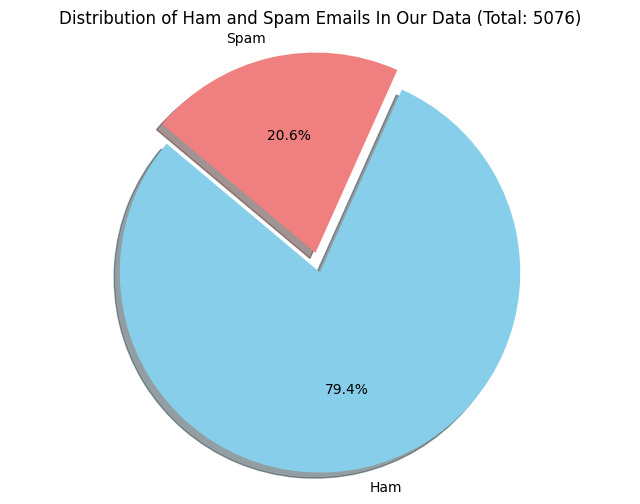

In [3]:
# Import the required libraries
import matplotlib.pyplot as plt

# Define data for the pie chart
labels = ['Ham', 'Spam']  # Labels for the two slices (ham and spam)
sizes = [num_ham_emails, num_spam_emails]  # Sizes (counts) of ham and spam emails
colors = ['skyblue', 'lightcoral']  # Colors for the two slices
explode = (0, 0.1)  # Explode the second slice (Spam) to create separation between slices

# Create a figure for the pie chart with a specified size (8x6 inches)
plt.figure(figsize=(8, 6))

# Generate the pie chart using the data
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Set the aspect ratio to 'equal' to ensure the pie chart is drawn as a circle
plt.axis('equal')

# Add a title to the pie chart, displaying the total number of emails in the dataset
plt.title('Distribution of Ham and Spam Emails In Our Data (Total: {})'.format(total_emails))

# Display the pie chart
plt.show()


We Can See That The Data Is Not Balance In The Spam/Ham Distribution, this can be managed by using class-weighting.

Lets Try The Naive Bayse Approach.

Accuracy: 0.9439
Precision: 0.9329
Recall: 0.7688
F1 Score: 0.8430


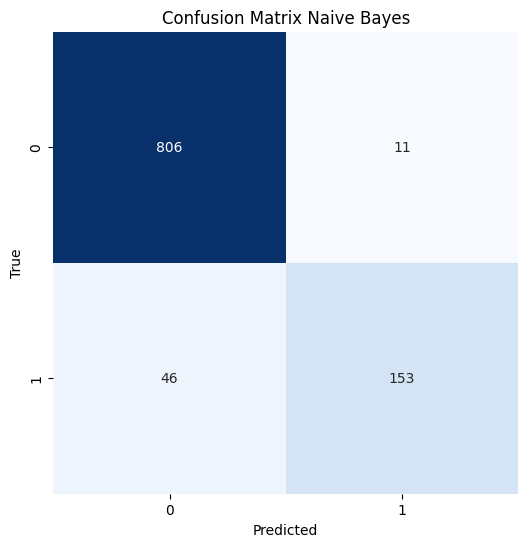

In [4]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data into numerical features,TfidfVectorizer: This class from scikit-learn is used to convert the text data into numerical features using the 
# TF-IDF (Term Frequency-Inverse Document Frequency) technique.
#  It assigns weights to words based on their frequency in the document and the entire corpus to represent the documents as numerical vectors.
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform on the training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform only on the testing data using the vocabulary from training

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf.toarray(), y_train)  # Convert sparse matrix to array for training

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf.toarray())  # Convert sparse matrix to array for predictions

# Calculate evaluation metrics (accuracy, precision, recall, F1 score)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix to visualize the classifier's performance
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes')
plt.show()


We Can See That Using The Naive Bayse Algorithim Has landed Us A 84% F1 Score,Lets See How We Can Improve This.

Lets Investigate The Times Our Model Has Guessed Incorrectly 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


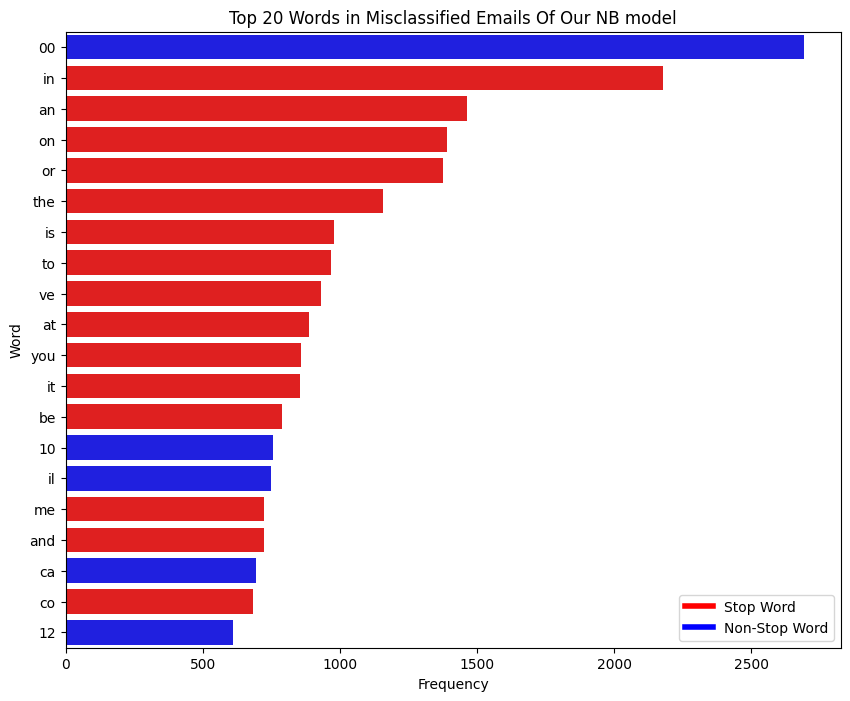

In [5]:
# Import required libraries
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download the list of English stop words if not already downloaded
nltk.download('stopwords')

# Get the English stop words from both NLTK and sklearn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

# Combine both sets of stop words
english_stop_words = nltk_stop_words.union(sklearn_stop_words)

# Identify false predictions
false_ham_indices = np.where((y_test == 0) & (y_pred == 1))[0]
false_spam_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# Get false ham and spam email contents
false_ham = [X_test[i] for i in false_ham_indices]
false_spam = [X_test[i] for i in false_spam_indices]

# Count word frequencies in each array
false_ham_texts = " ".join(false_ham)
false_spam_texts = " ".join(false_spam)

false_ham_vectorizer = CountVectorizer()
false_ham_vectorized = false_ham_vectorizer.fit_transform([false_ham_texts])
false_ham_word_counts = np.array(false_ham_vectorized.sum(axis=0)).flatten()

false_spam_vectorizer = CountVectorizer()
false_spam_vectorized = false_spam_vectorizer.fit_transform([false_spam_texts])
false_spam_word_counts = np.array(false_spam_vectorized.sum(axis=0)).flatten()

# Get the most used words in each array
def get_most_used_words(vectorizer, word_counts, category):
    words = np.array(vectorizer.get_feature_names_out())
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_counts})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Show the top 20 most used words
    #print(f"\nMost used words in {category}:\n", word_freq_df)

get_most_used_words(false_ham_vectorizer, false_ham_word_counts, "false_Ham")
get_most_used_words(false_spam_vectorizer, false_spam_word_counts, "false_Spam")

# Find common words between the two arrays
common_words = set(false_ham_vectorizer.get_feature_names_out()).intersection(false_spam_vectorizer.get_feature_names_out())

# Convert sets to lists for Venn diagram labels
false_ham_list = list(false_ham_vectorizer.get_feature_names_out())
false_spam_list = list(false_spam_vectorizer.get_feature_names_out())

# Plot the intersection words
common_words_freq = []

# Predefine a set of colors for the stop words
stop_word_colors = {word: 'red' for word in english_stop_words}

# Use blue for non-stop words
non_stop_word_color = 'blue'

for word in common_words:
    frequency = false_ham_texts.count(word) + false_spam_texts.count(word)
    color = stop_word_colors.get(word, non_stop_word_color)  # Use red if it's an English stop word, otherwise use blue
    common_words_freq.append((word, frequency, color))

common_words_freq.sort(key=lambda x: x[1], reverse=True)
common_words_df = pd.DataFrame(common_words_freq, columns=['Word', 'Frequency', 'Color'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df.head(20), palette=common_words_df['Color'].head(20))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words in Misclassified Emails Of Our NB model')

# Add custom legend
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Stop Word'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Non-Stop Word')]
plt.legend(handles=legend_elements)

plt.show()


We Can See by Looking in the Bar Chart Above Plotting the Most Common Words in Emails We Misclassified, that most of the words are common English stop words that can be dropped without losing the general meaning of an email,
we can also take notice that numbers in emails are confusing our model, and dropping numbers wouldn't make the email lose value, we can also assume that punctuation, capitalization, and special character can confuse our model.

To Better Understand Our Data Let's plot The Most Used Word In Each Class of Emails.

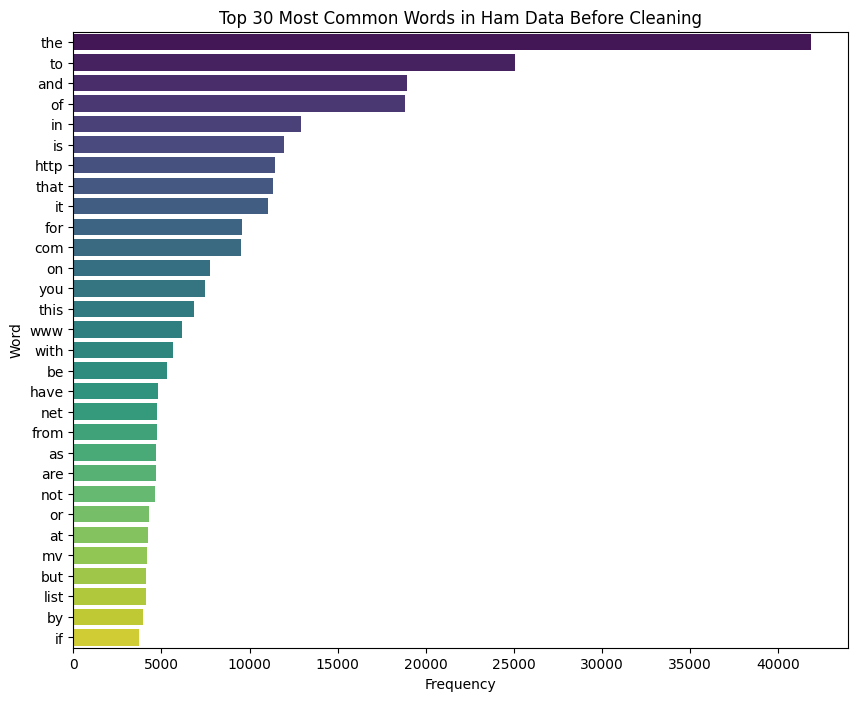

In [6]:
# Flatten the ham_data list to create a single list of email contents
ham_data_flat = list(itertools.chain.from_iterable(ham_data))

# Create a CountVectorizer to convert the email contents into numerical word frequencies
ham_vectorizer = CountVectorizer()
X_ham_count = ham_vectorizer.fit_transform(ham_data_flat)

# Calculate the word frequencies in the ham dataset
ham_word_counts = np.array(X_ham_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
ham_words = np.array(ham_vectorizer.get_feature_names_out())
ham_word_freq_df = pd.DataFrame({'Word': ham_words, 'Frequency': ham_word_counts})
ham_word_freq_df = ham_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in the ham dataset
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=ham_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Ham Data Before Cleaning')
plt.show()


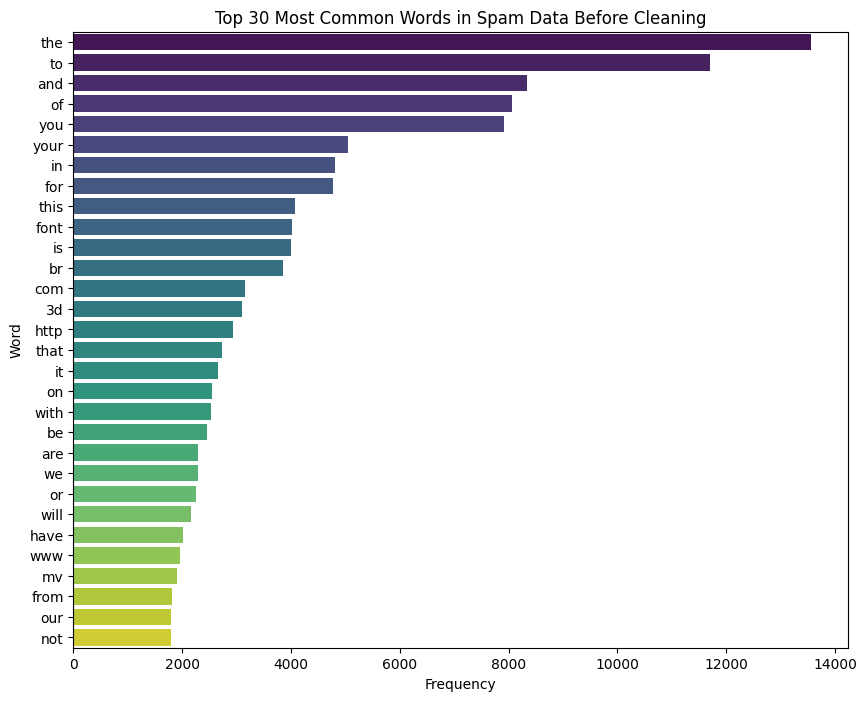

In [7]:
# Flatten the spam_data list to create a single list of email contents
spam_data_flat = list(itertools.chain.from_iterable(spam_data))

# Create a CountVectorizer to convert the email contents into numerical word frequencies
spam_vectorizer = CountVectorizer()
X_spam_count = spam_vectorizer.fit_transform(spam_data_flat)

# Calculate the word frequencies in the spam dataset
spam_word_counts = np.array(X_spam_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
spam_words = np.array(spam_vectorizer.get_feature_names_out())
spam_word_freq_df = pd.DataFrame({'Word': spam_words, 'Frequency': spam_word_counts})
spam_word_freq_df = spam_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in the spam dataset
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=spam_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Data Before Cleaning')
plt.show()


We Can See That The Most Common Words In Spam Or Ham Are Not Unique Since We have Alot Of Common Stop Word That Are populating Both Unnecessarily 

Cleaning The Data

Here We Drop All numbers,Punctuation,Capitalization,Links and common English Stopwords.

In [8]:
import os
import glob
import numpy as np
import email
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import the Snowball stemmer
from nltk.stem import SnowballStemmer

# Function to clean and preprocess the email content
def clean_text(email_content):
    # Convert the email content to lowercase
    email_content = email_content.lower()

    # Remove hyperlinks from the text
    email_content = ' '.join(word for word in email_content.split() if not word.startswith('http'))

    # Remove special characters, symbols, and numbers, keeping only alphabetic characters and spaces
    email_content = ''.join(char for char in email_content if char.isalpha() or char.isspace())

    # Tokenize the text (split into words)
    words = nltk.word_tokenize(email_content)

    # Remove punctuation from the words
    words = [word for word in words if word not in string.punctuation]

    # Remove stopwords (common words like 'the', 'and', 'is', etc. that do not carry much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization: Reduce words to their base or root form (e.g., 'running' becomes 'run')
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Stemming: Reducing words to their stem or root form (e.g., 'running' becomes 'run')
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]

    # Join the cleaned words back into a string
    cleaned_content = ' '.join(words)

    return cleaned_content

# Clean and preprocess all email contents using the clean_text function
all_data_cleaned = [clean_text(email_content) for email_content in all_data]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lets See The Most Common Used Words In Each Class Of Data After It Has Been Cleaned.

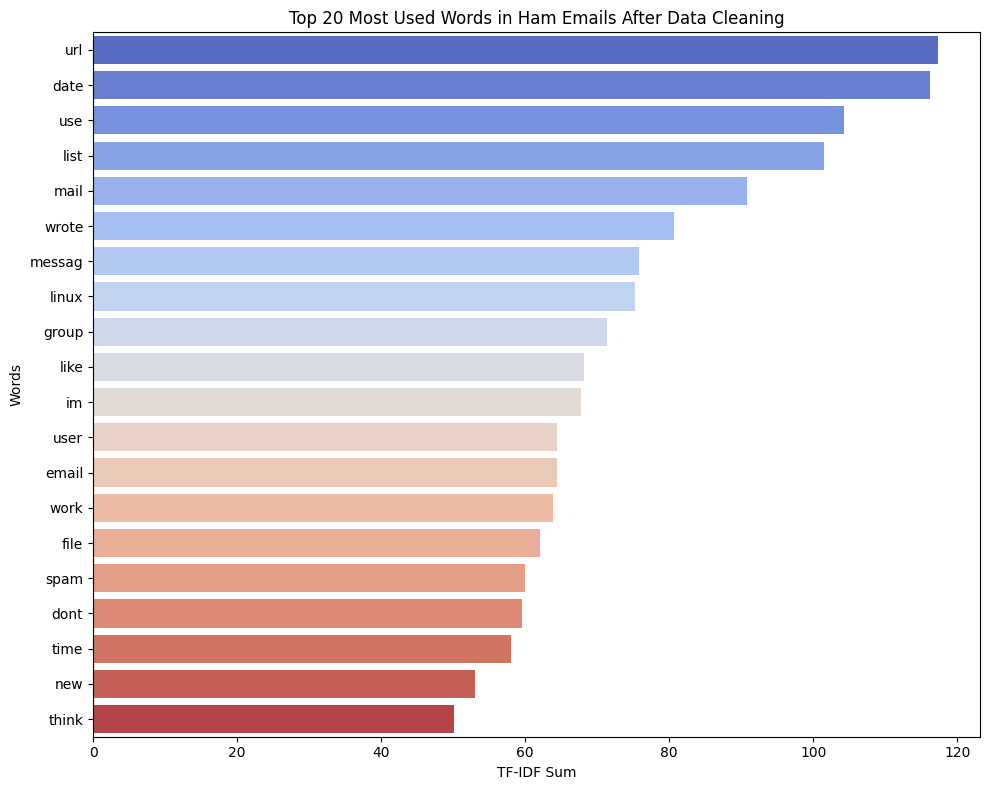

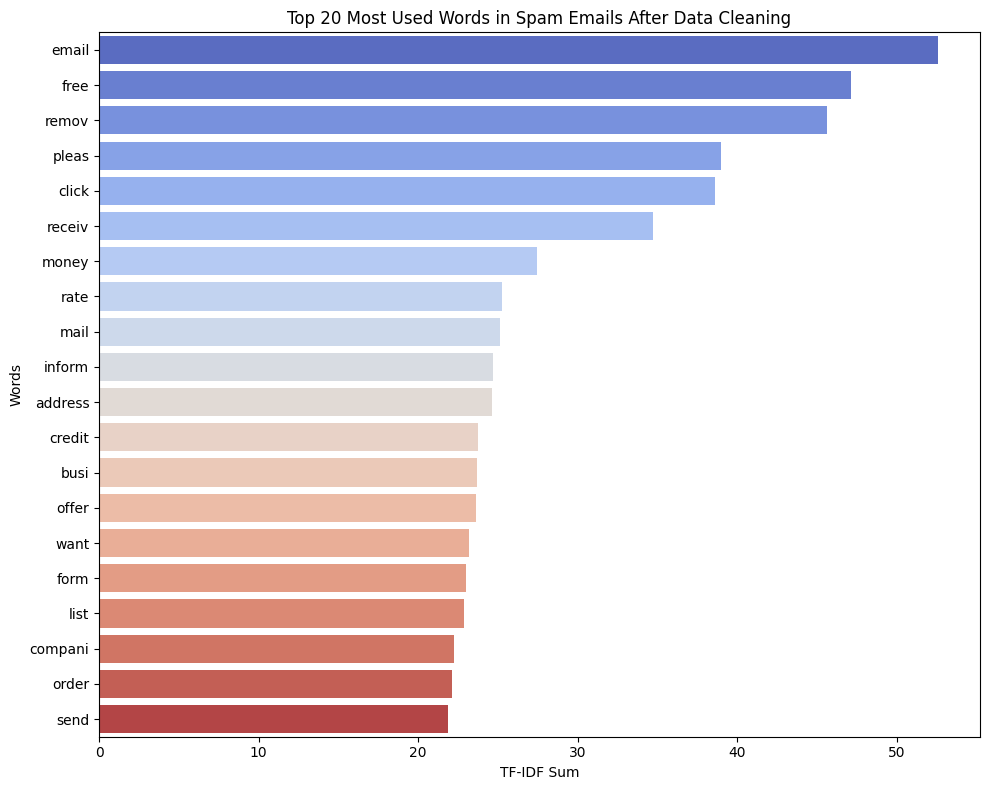

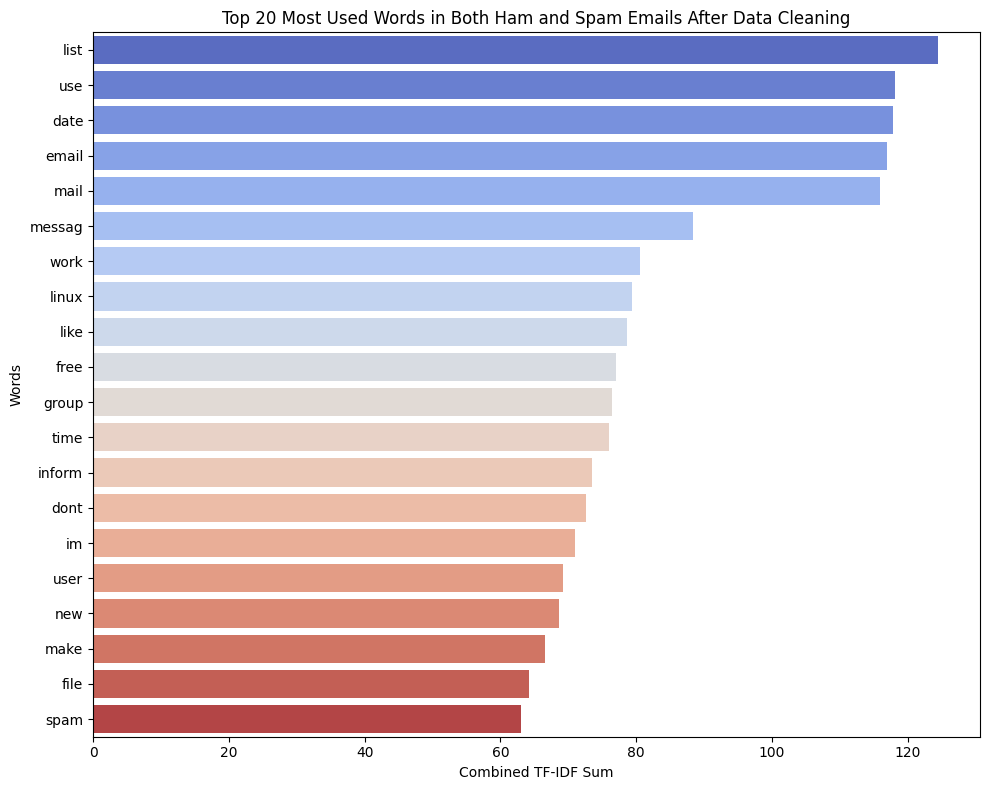

In [9]:
# Create the TF-IDF vectorizer with a maximum of 10,000 features and remove English stop words
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the cleaned data to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(all_data_cleaned)

# Separate the ham and spam data based on labels
ham_indices = np.where(all_labels == 0)[0]
spam_indices = np.where(all_labels == 1)[0]

ham_tfidf_matrix = tfidf_matrix[ham_indices]
spam_tfidf_matrix = tfidf_matrix[spam_indices]

# Calculate the sum of TF-IDF values for each word in ham and spam emails
ham_word_tfidf_sum = np.asarray(ham_tfidf_matrix.sum(axis=0)).squeeze()
spam_word_tfidf_sum = np.asarray(spam_tfidf_matrix.sum(axis=0)).squeeze()

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sort the indices based on the TF-IDF sum to get the most used words
top_1000_ham_indices = np.argsort(ham_word_tfidf_sum)[::-1][:1000]
top_1000_spam_indices = np.argsort(spam_word_tfidf_sum)[::-1][:1000]

# Get the top 1000 most used words in ham and spam
top_1000_ham_words = feature_names[top_1000_ham_indices]
top_1000_spam_words = feature_names[top_1000_spam_indices]

# Plot the bar graph for the top 20 most used words in ham emails
plt.figure(figsize=(10, 8))
sns.barplot(x=ham_word_tfidf_sum[top_1000_ham_indices[:20]], y=top_1000_ham_words[:20], palette='coolwarm')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Words')
plt.title('Top 20 Most Used Words in Ham Emails After Data Cleaning')
plt.tight_layout()
plt.show()

# Plot the bar graph for the top 20 most used words in spam emails
plt.figure(figsize=(10, 8))
sns.barplot(x=spam_word_tfidf_sum[top_1000_spam_indices[:20]], y=top_1000_spam_words[:20], palette='coolwarm')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Words')
plt.title('Top 20 Most Used Words in Spam Emails After Data Cleaning')
plt.tight_layout()
plt.show()

# Find the indices of the words that appear in both ham and spam emails
common_word_indices = np.intersect1d(top_1000_ham_indices, top_1000_spam_indices)

# Calculate the combined TF-IDF sum of those words in both ham and spam emails
combined_word_tfidf_sum = ham_word_tfidf_sum[common_word_indices] + spam_word_tfidf_sum[common_word_indices]

# Sort the combined TF-IDF sums to get the top 20 most used words
top_20_common_indices = np.argsort(combined_word_tfidf_sum)[::-1][:20]

# Get the top 20 most used words that intersect in both ham and spam emails
top_20_common_words = feature_names[common_word_indices][top_20_common_indices]

# Plot the bar graph for the top 20 most used words that appear in both ham and spam emails
plt.figure(figsize=(10, 8))
sns.barplot(x=combined_word_tfidf_sum[top_20_common_indices], y=top_20_common_words, palette='coolwarm')
plt.xlabel('Combined TF-IDF Sum')
plt.ylabel('Words')
plt.title('Top 20 Most Used Words in Both Ham and Spam Emails After Data Cleaning')
plt.tight_layout()
plt.show()


After Cleaning The Data We Can Now See That The Top 20 Most Used Words In Spam Are Unique To Ham Emails, This Should Help Our Model In Classifying The Emails.

Let Run Naive Bayse On The Cleaned Data

Accuracy: 0.9380
Precision: 0.8505
Recall: 0.8291
F1 Score: 0.8397


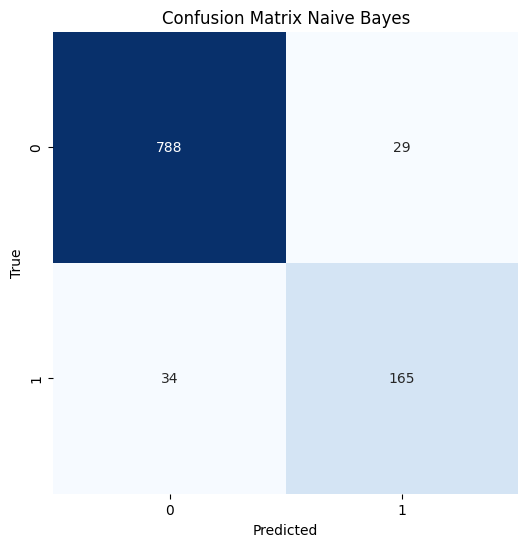

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data_cleaned, all_labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf.toarray())

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes')
plt.show()


We Can See That After Cleaning The Data And Running The Naive Bayse Model On It That The F1 Score Hasn't Improved,It Even Got Slighlty Worse, This Means that The Naive Bayse Model Isnt getting Affected By The Way We Cleaned Our Data.
Lets Try Another Way That We Can Improve The F1 Score Of The Naive Bayse Algo.

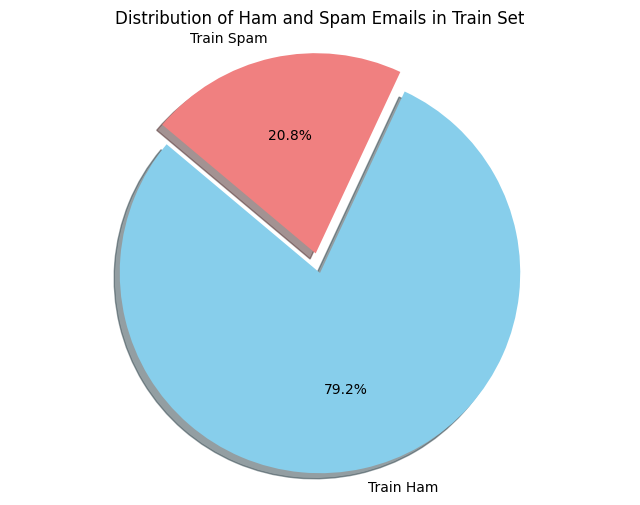

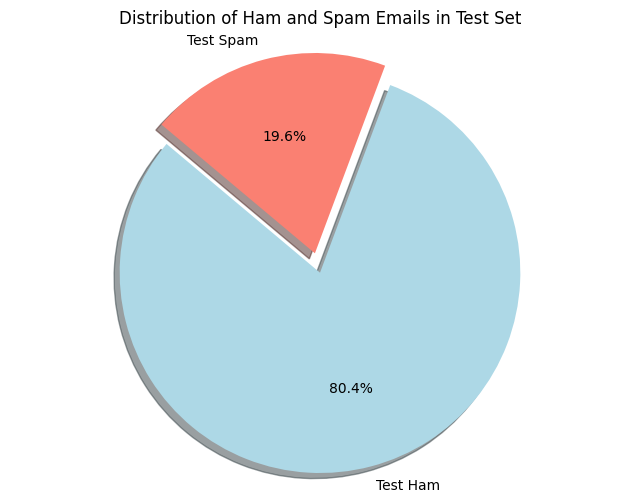

In [11]:
# Count the number of ham and spam emails in the train and test sets
train_ham_count = np.sum(y_train == 0)
train_spam_count = np.sum(y_train == 1)
test_ham_count = np.sum(y_test == 0)
test_spam_count = np.sum(y_test == 1)

# Plot the distribution of ham and spam emails in the train set
labels_train = ['Train Ham', 'Train Spam']
sizes_train = [train_ham_count, train_spam_count]
colors_train = ['skyblue', 'lightcoral']
explode_train = (0.1, 0)  # Explode the Ham slice for better visibility

plt.figure(figsize=(8, 6))
plt.pie(sizes_train, explode=explode_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ham and Spam Emails in Train Set')
plt.show()

# Plot the distribution of ham and spam emails in the test set
labels_test = ['Test Ham', 'Test Spam']
sizes_test = [test_ham_count, test_spam_count]
colors_test = ['lightblue', 'salmon']
explode_test = (0.1, 0)  # Explode the Ham slice for better visibility

plt.figure(figsize=(8, 6))
plt.pie(sizes_test, explode=explode_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ham and Spam Emails in Test Set')
plt.show()


We Saw Earlier That Our Data Is Not Distributed Evenly, We Have About 80% Ham Emails And 20% Spam Emails. We Can Manage This Significant Imbalance By Using Class Weighting.

Accuracy: 0.9577
Precision: 0.9278
Recall: 0.8612
F1 Score: 0.8933


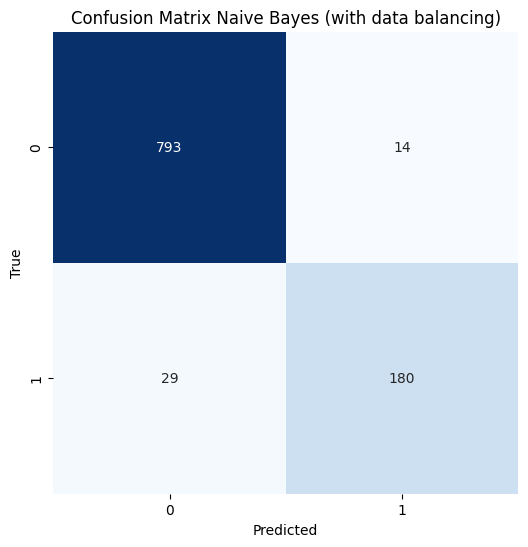

In [12]:
# Naive Bayes with data balancing using SMOTE and RUS

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split data into training and testing sets while maintaining the class proportions
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a pipeline with SMOTE and RUS for data balancing
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8, random_state=42)),  # Use SMOTE to oversample the minority class to have 80% of the majority class size
    ('rus', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),  # Use RUS to undersample the majority class to have the same size as the minority class
    ('nb', nb_classifier)  # Using the Naive Bayes classifier
])

# Train the classifier on the balanced data
pipeline.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf.toarray())

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy measures the overall correctness of the classifier
precision = precision_score(y_test, y_pred)  # Precision measures the proportion of true positive predictions among all positive predictions
recall = recall_score(y_test, y_pred)  # Recall measures the proportion of true positive predictions among all actual positive instances
f1 = f1_score(y_test, y_pred)  # F1 score is the harmonic mean of precision and recall, providing a balanced metric between the two

# Print the calculated metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Confusion matrix is a table showing true and false positive/negative predictions

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # Heatmap visualization of the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes (with data balancing)')
plt.show()


We Can See That  Using Class Weighting where We Have A More Balanced Ration in the Train Set We Achive About 90% F1 Score Even Without Data Cleaning.

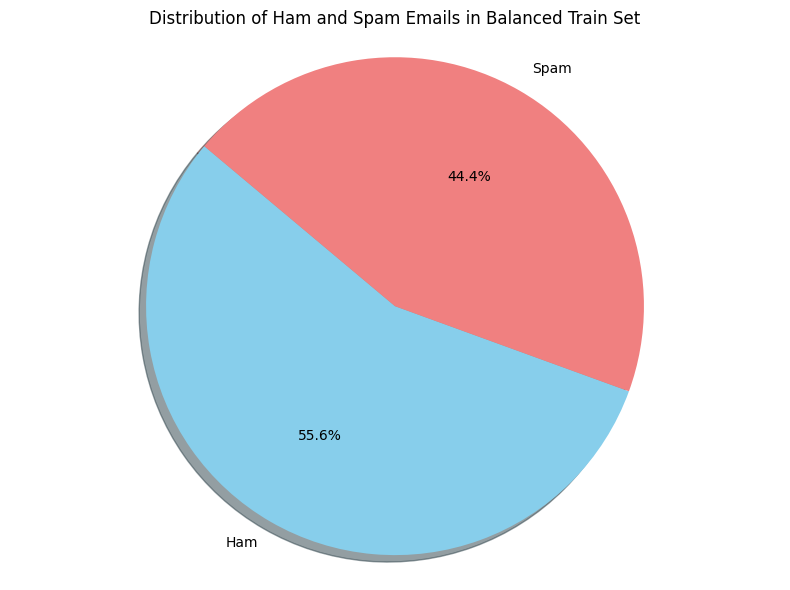

In [13]:
# After fitting the pipeline, you can retrieve the balanced training data using SMOTE and RUS
X_train_balanced, y_train_balanced = pipeline['smote'].fit_resample(X_train_tfidf.toarray(), y_train)

# Plot the distribution of ham and spam emails in the balanced train set
import matplotlib.pyplot as plt

# Prepare data for the pie chart
train_labels_balanced = ['Ham', 'Spam']
train_sizes_balanced = [np.sum(y_train_balanced == 0), np.sum(y_train_balanced == 1)]
train_colors_balanced = ['skyblue', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(train_sizes_balanced, labels=train_labels_balanced, colors=train_colors_balanced, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ham and Spam Emails in Balanced Train Set')

# Display the pie chart
plt.tight_layout()
plt.show()


lets See How Cleaning The Data Affects Our Model With Data Balancing.


Accuracy: 0.9380
Precision: 0.8544
Recall: 0.8421
F1 Score: 0.8482


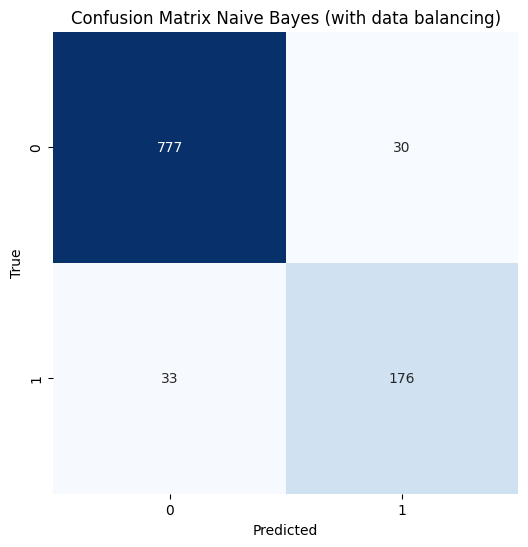

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split data into training and testing sets while maintaining the class proportions
X_train, X_test, y_train, y_test = train_test_split(all_data_cleaned, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a pipeline with SMOTE and RUS for data balancing
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8, random_state=42)),  
    # SMOTE (Synthetic Minority Over-sampling Technique) is used to oversample the minority class to address class imbalance.
    # The 'sampling_strategy' parameter specifies the desired ratio of the number of samples in the minority class to the majority class.
    # Here, the minority class is set to be 80% the size of the majority class.

    ('rus', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),  
    # RUS (Random Under-sampling) is used to undersample the majority class to match the size of the minority class.
    # The 'sampling_strategy' parameter specifies the desired ratio of the number of samples in the majority class to the minority class.
    # Here, the majority class is set to be the same size as the minority class.

    ('nb', nb_classifier)
    # The Naive Bayes classifier is used as the final estimator in the pipeline.
])

# Train the classifier on the balanced data
pipeline.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf.toarray())

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes (with data balancing)')
plt.show()


We Can See That After Cleaning The Data We Lost 5% of The F1 Score That We Achieved Without Cleaning the Data, This Means That Cleaning The Data Makes It Lose Valuable Info That Our Model Uses To Make Connections That Classify Efficiently.

In Short Cleaning The Data Makes The NB Model Underfit!

Until Now We Used The Naive Bayes Algo And The Best We Got Was About 90% f1 Score, Lets Try Other Classifiers That Can get Us Better F1 Scores.

SVM(Support Vector Machine) Implementation.


Best SVM Classifier Metrics:
Accuracy: 0.9852
Precision: 0.9619
Recall: 0.9665
F1 Score: 0.9642
Cross-Validation F1 Scores: [0.97380586 0.98305085 0.97839506 0.98918083 0.9847561 ]
Mean F1 Score: 0.9818377393060228
Standard Deviation of F1 Scores: 0.005296653413455276


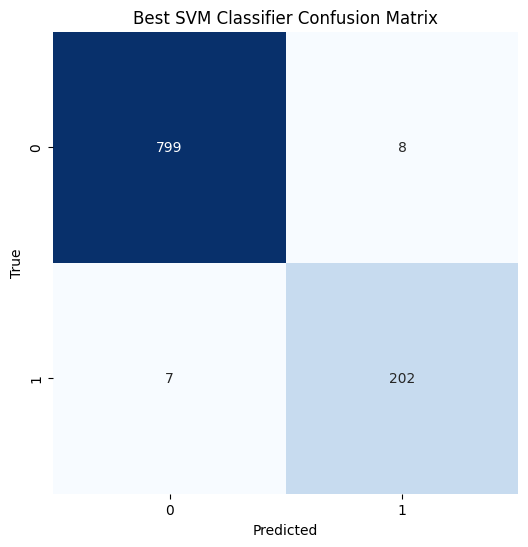

In [15]:
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets while maintaining the class proportions
X_train, X_test, y_train, y_test = train_test_split(all_data_cleaned, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Perform data balancing using SMOTE only on the training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
# SMOTE (Synthetic Minority Over-sampling Technique) is used to oversample the minority class (spam) to address class imbalance.
# The 'sampling_strategy' parameter specifies the desired ratio of the number of samples in the minority class to the majority class.
# Here, the ratio is set to 1:2, which means we want 50% of spam samples in the balanced data.

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Create a Support Vector Machine (SVM) classifier with a linear kernel
svm_classifier = SVC(kernel='sigmoid', random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10]}
# C is the regularization parameter for SVM. The grid contains different values of C to search for the best hyperparameters.

# Perform grid search to find the best hyperparameters using F1 score as the evaluation metric
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best SVM classifier with tuned hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best SVM classifier
y_pred_svm = best_svm_classifier.predict(X_test_tfidf)

# Calculate metrics for the best SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print metrics for the best SVM classifier
print("Best SVM Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_svm))
print("Precision: {:.4f}".format(precision_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))

# Generate and plot the confusion matrix for the best SVM classifier
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Perform cross-validation on the best SVM classifier to evaluate its generalization performance
svm_scores = cross_val_score(best_svm_classifier, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation F1 Scores:", svm_scores)
print("Mean F1 Score:", np.mean(svm_scores))
print("Standard Deviation of F1 Scores:", np.std(svm_scores))

# Plot the confusion matrix as a heatmap to visualize the classifier's performance
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Best SVM Classifier Confusion Matrix')
plt.show()


We Can See That Using SVM In Sigmoid And Data Balancing We Are Getting Very High F1 Scores About 98%!

Let's compare SVM and Naive Bayes and discuss why SVM may have performed better in this scenario.

1. **Model Complexity:**
   - SVM: SVM is a more complex model compared to Naive Bayes, especially when using a linear kernel. It can learn more complex decision boundaries and capture intricate relationships between features and labels.
   - Naive Bayes: Naive Bayes is a simple probabilistic model that assumes feature independence, making it less flexible when dealing with complex relationships between features.

2. **Data Balancing:**
   - SVM: SVM was used with data balancing techniques like SMOTE and Random Under-Sampling to address the class imbalance problem. This balancing helps the model learn from both classes more effectively, leading to better performance on the minority class (spam emails).
   - Naive Bayes: In the Naive Bayes implementation, no data balancing techniques were applied. This could lead to an imbalance in the model's learning and affect its performance on the minority class.

3. **Feature Representation:**
   - SVM: Both SVM and Naive Bayes used the same TF-IDF vectorizer to convert email contents into numerical representations. However, SVM might have been able to leverage the feature representations more effectively due to its ability to learn complex decision boundaries.
   - Naive Bayes: Despite using the same TF-IDF vectorizer, Naive Bayes' assumption of feature independence might have led to suboptimal exploitation of feature representations in complex scenarios.

4. **Model Learning:**
   - SVM: SVM learns from the data by finding the optimal hyperplane that best separates different classes. With the data balancing and more complex decision boundaries, SVM can make better distinctions between spam and ham emails.
   - Naive Bayes: Naive Bayes makes predictions based on simple probability calculations. While it can work well for certain tasks, it might not be as effective in distinguishing complex patterns in the data, especially in the presence of class imbalance.

5. **Regularization:**
   - SVM: SVM has a regularization parameter 'C' that controls the trade-off between maximizing the margin and minimizing classification errors. By tuning this hyperparameter using cross-validation, SVM can adapt better to the data and avoid overfitting.
   - Naive Bayes: Naive Bayes does not have regularization parameters like SVM. It might be more prone to overfitting or underfitting the data, especially when dealing with uncleaned or imbalanced data.

Overall, SVM's ability to handle complex relationships, effective use of data balancing, and regularization might have contributed to its better performance compared to Naive Bayes. However, it's essential to note that model performance can vary depending on the specific dataset and task, and sometimes Naive Bayes can outperform SVM in certain scenarios. Regular evaluation and experimentation with different algorithms and techniques are crucial to finding the best model for a particular problem.


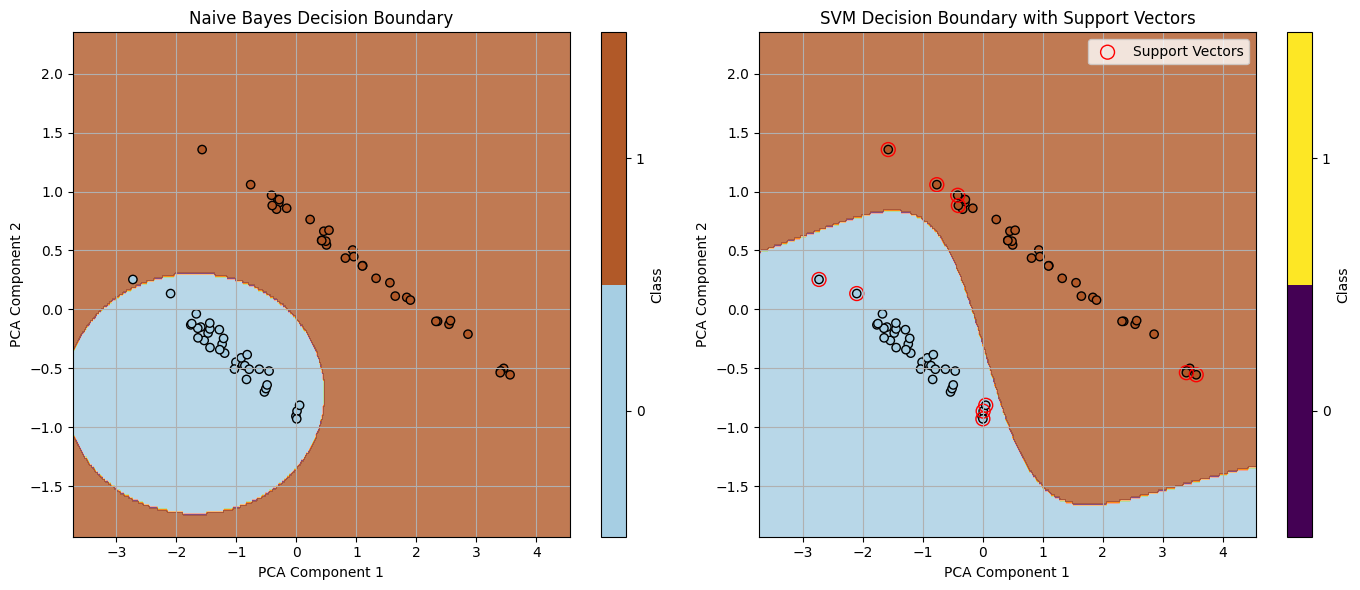

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Generate a synthetic dataset with 100 samples, 2 informative features, and 1 cluster per class
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit Naive Bayes classifier on the PCA-transformed training data
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train)

# Fit SVM classifier with the sigmoid kernel on the PCA-transformed training data
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train_pca, y_train)

# Create a meshgrid to plot decision boundaries
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries for both classifiers side by side
plt.figure(figsize=(14, 6))

# Plot Naive Bayes decision boundary on the left subplot
plt.subplot(1, 2, 1)
Z_nb = nb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nb = Z_nb.reshape(xx.shape)
plt.contourf(xx, yy, Z_nb, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.colorbar(ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5], label='Class')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Naive Bayes Decision Boundary')
plt.grid(True)

# Plot SVM decision boundary with support vectors on the right subplot
plt.subplot(1, 2, 2)
Z_svm = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')
plt.colorbar(ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5], label='Class')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.grid(True)

# Adjust subplot layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


Decision Tree On Unclean Data Then Adaboost On It.

Accuracy: 0.8396
Precision: 0.6023
Recall: 0.5327
F1 Score: 0.5653


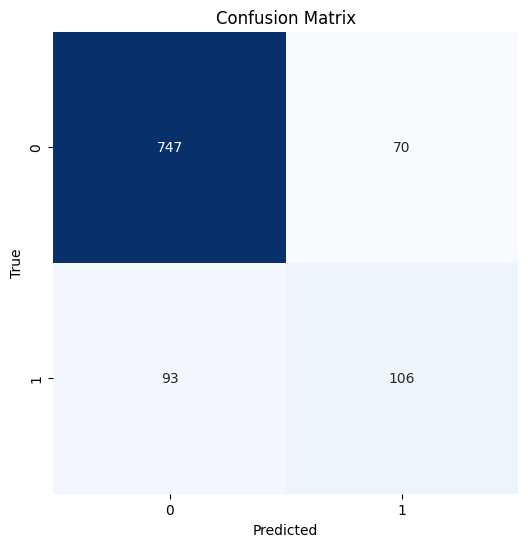

In [17]:
#A decision tree is a tree-like model that makes decisions by recursively splitting data based on features,
# leading to a final prediction at the leaf nodes. It is widely used for both classification and regression tasks in machine learning.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Decision Tree classifier (adjust max_depth as needed)
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AdaBoost Classifier Metrics:
Accuracy: 0.9695
Precision: 0.9118
Recall: 0.9347
F1 Score: 0.9231


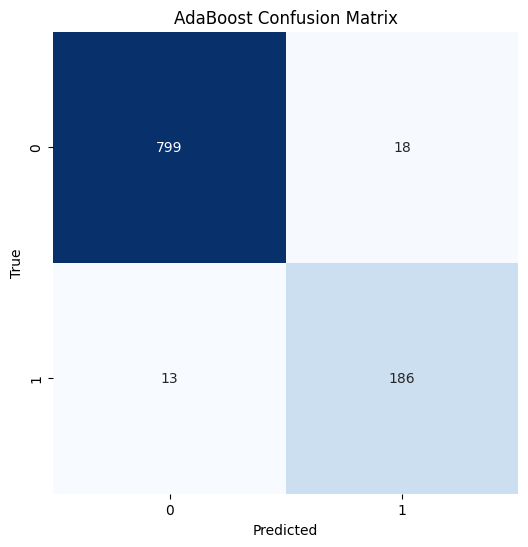

In [18]:
# AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners (e.g., decision trees) to create a strong classifier.
# The algorithm iteratively trains weak learners on different subsets of the data, giving higher weights to misclassified data points in each round.
# The predictions of weak learners are combined through weighted voting, where more accurate learners contribute more to the final prediction.
# By adjusting weights and focusing on difficult-to-classify instances, AdaBoost creates a robust ensemble classifier that outperforms individual decision trees.

# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier using `dt_classifier` as the base classifier
adaboost_classifier = AdaBoostClassifier(estimator=dt_classifier, random_state=42)
adaboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set using the trained AdaBoost classifier
y_pred_adaboost = adaboost_classifier.predict(X_test_tfidf)

# Calculate performance metrics for the AdaBoost classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print the calculated metrics for the AdaBoost classifier
print("AdaBoost Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_adaboost))
print("Precision: {:.4f}".format(precision_adaboost))
print("Recall: {:.4f}".format(recall_adaboost))
print("F1 Score: {:.4f}".format(f1_adaboost))

# Generate the confusion matrix to evaluate the AdaBoost classifier's performance
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Plot the confusion matrix for the AdaBoost classifier as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')
plt.show()
